Chapter 4: Transportation Data

Script 4-1: Shortest Paths on Stores Data

In [1]:
#import packages
import networkx as nx

{('store1', 'store2'): Text(0.6750186001288071, -0.3982874688892476, '2'),
 ('store1', 'store3'): Text(-0.20344590002290444, -0.7783634435208852, '2.4'),
 ('store1', 'store4'): Text(-0.24325661531174173, -0.2002662609759025, '3'),
 ('store1', 'store5'): Text(0.30466711101078037, 0.06154141330698232, '3'),
 ('store2', 'store3'): Text(0.11625056956927571, -0.2997337390240974, '3.7'),
 ('store2', 'store4'): Text(0.07643985428043842, 0.27836344352088527, '1.4'),
 ('store2', 'store5'): Text(0.6243635806029606, 0.54017111780377, '4.3'),
 ('store3', 'store4'): Text(-0.8020246458712731, -0.10171253111075229, '4.9'),
 ('store3', 'store5'): Text(-0.25410091954875097, 0.16009514317213253, '0.9'),
 ('store4', 'store5'): Text(-0.29391163483758825, 0.7381923257171152, '5.4')}

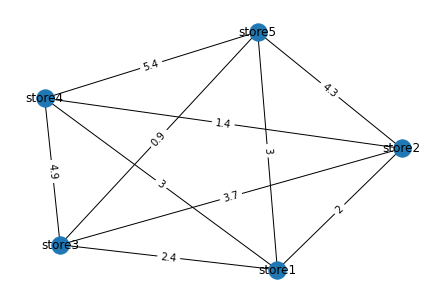

In [2]:
#create the Stores network
STRS = nx.Graph()
STRS.add_nodes_from(["store1","store2","store3","store4","store5"])

#define weights of ebunch
e1 = [("store1","store2",2),("store1","store3",2.4),("store1","store4",3),("store1","store5",3)]
e2 = [("store2","store3",3.7),("store2","store4",1.4),("store2","store5",4.3)]
e3 = [("store3","store4",4.9),("store3","store5",0.9),("store4","store5",5.4)]

#add edges
STRS.add_weighted_edges_from(e1)
STRS.add_weighted_edges_from(e2)
STRS.add_weighted_edges_from(e3)

#plot
weight_labels=nx.get_edge_attributes(STRS,'weight')
pos = nx.spring_layout(STRS)
nx.draw(STRS,pos,with_labels=True,)
nx.draw_networkx_edge_labels(STRS,pos,edge_labels=weight_labels) 

In [3]:
#create adjacency matrix
adj1 = nx.adjacency_matrix(STRS)
adj1.todense() 

array([[0. , 2. , 2.4, 3. , 3. ],
       [2. , 0. , 3.7, 1.4, 4.3],
       [2.4, 3.7, 0. , 4.9, 0.9],
       [3. , 1.4, 4.9, 0. , 5.4],
       [3. , 4.3, 0.9, 5.4, 0. ]])

In [4]:
#find shortest paths starting at Store 1
length1, path1 = nx.single_source_dijkstra(STRS,"store1")
length1

{'store1': 0, 'store2': 2, 'store3': 2.4, 'store4': 3, 'store5': 3}

Script 4-2: A* algorithm

{('store1', 'store2'): Text(-0.5110901523075121, 0.38127465011205297, '2'),
 ('store1', 'store4'): Text(-0.33139442242833844, -0.10764499632803519, '3'),
 ('store2', 'store3'): Text(0.10826121168344023, 0.6076449963280353, '3.7'),
 ('store2', 'store4'): Text(-0.055243645530390434, 0.25022662442940297, '1.4'),
 ('store3', 'store4'): Text(0.28795694156261387, 0.11872534988794715, '4.9'),
 ('store4', 'store5'): Text(0.2853592529192898, -0.6193465110053425, '5.4')}

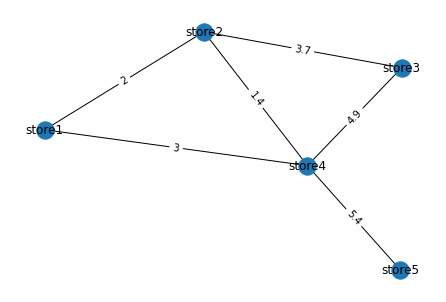

In [5]:
#create a different Stores network
STRS2 = nx.Graph()
STRS2.add_nodes_from(["store1","store2","store3","store4","store5"])

#define weights of ebunch
e12 = [("store1","store2",2),("store1","store4",3)]
e22 = [("store2","store3",3.7),("store2","store4",1.4)]
e32 = [("store3","store4",4.9),("store4","store5",5.4)]

#add edges
STRS2.add_weighted_edges_from(e12)
STRS2.add_weighted_edges_from(e22)
STRS2.add_weighted_edges_from(e32)

#plot
weight_labels=nx.get_edge_attributes(STRS2,'weight')
pos = nx.spring_layout(STRS2)
nx.draw(STRS2,pos,with_labels=True,)
nx.draw_networkx_edge_labels(STRS2,pos,edge_labels=weight_labels) 

In [6]:
#find shortest path from Store 2 to Store 5
nx.astar_path(STRS2,"store2","store5", weight='weight')

['store2', 'store4', 'store5']

Script 4-3: Traveling Salesman Problem

In [7]:
#define traveling salesman algorithm and apply it to the stores networks
tsp = nx.approximation.traveling_salesman_problem
tsp(STRS)

['store1', 'store3', 'store5', 'store4', 'store2', 'store1']

In [8]:
#apply TSP algorithm to the second stores networks
tsp(STRS2)

['store1',
 'store4',
 'store5',
 'store4',
 'store2',
 'store3',
 'store2',
 'store1']

Script 4-4: Maximum Flow/Minimum Cut Algorithm

In [9]:
#build the city intersection network
G1=nx.DiGraph()
G1.add_edge("a", "b", capacity=2.0)
G1.add_edge("a", "d", capacity=0.5)
G1.add_edge("b", "d", capacity=3.0)
G1.add_edge("c", "d", capacity=2.5)
G1.add_edge("c", "e", capacity=1.0)
G1.add_edge("e", "f", capacity=4.0)
G1.add_edge("f", "g", capacity=1.0)

{('a', 'b'): Text(-0.567604752240033, 0.18135830275799097, '2.0'),
 ('a', 'd'): Text(-0.726853900310592, 0.1807546992189645, '0.5'),
 ('b', 'd'): Text(-0.7048010782322602, 0.24045572112290678, '3.0'),
 ('c', 'd'): Text(-0.522076158683626, 0.1386608682331067, '2.5'),
 ('c', 'e'): Text(0.15981867009122883, -0.06250208712467721, '1.0'),
 ('e', 'f'): Text(0.5896809109236588, -0.19489131278049315, '4.0'),
 ('f', 'g'): Text(0.8398111953002138, -0.23878227442525388, '1.0')}

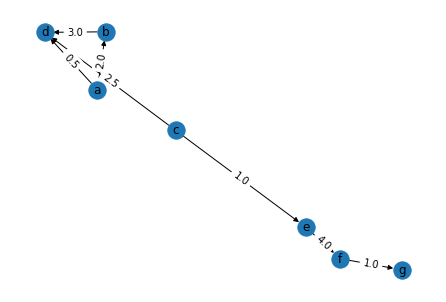

In [10]:
#plot network
capacity_labels=nx.get_edge_attributes(G1,'capacity') 
pos = nx.spring_layout(G1) 
nx.draw(G1,pos,with_labels=True,) 
nx.draw_networkx_edge_labels(G1,pos,edge_labels=capacity_labels) 

In [11]:
#find cut-points
partition = nx.minimum_cut(G1, "a", "g")
print(partition)

(0, ({'a', 'd', 'b'}, {'f', 'e', 'g', 'c'}))
